<a href="https://colab.research.google.com/github/Taurmayuri/stock-prediction/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Today, We will predict tesla stock price. Let's start!

%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
#from sklearn.Preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

import numpy as np # linear algebra
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
#Get the Dataset
df=pd.read_csv('/content/Tesla.csv - Tesla.csv.csv')
df.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [5]:
df.shape

(1692, 7)

In [6]:
print('Null Value Present: ', df.isnull().values.any())


Null Value Present:  False


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

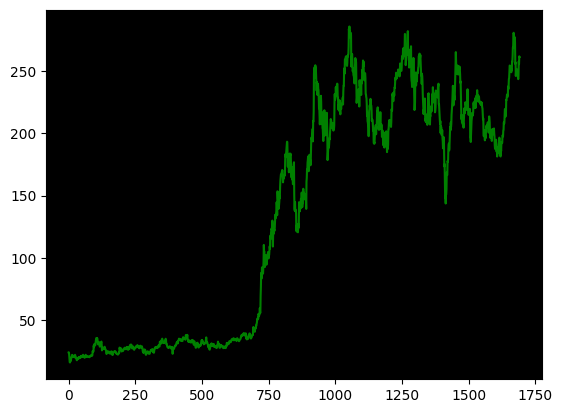

In [15]:
ax = plt.axes()
ax.set_facecolor("black")
df['Close'].plot(color='green')
output_var = pd.DataFrame(df['Close'])


In [9]:
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']


In [10]:
df['Open']=df['Open'].astype(float)
df['High']=df['High'].astype(float)
df['Low']=df['Low'].astype(float)

In [11]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()


,Open,High,Low,Volume
0,0.010533,0.030460,0.009645,0.503377
1,0.035539,0.050184,0.031347,0.460748
2,0.032630,0.033808,0.019931,0.218659
3,0.025264,0.023545,0.014053,0.135544
4,0.014216,0.012264,0.003202,0.182166


In [18]:
#Creating a Training Set and a Test Set for Stock Market Prediction
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()



In [19]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])


In [21]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')


In [22]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=500, batch_size=8, verbose=1, shuffle=False)


Epoch 1/500
193/193 [==============================] - 2s 2ms/step - loss: 23670.9062
Epoch 2/500
193/193 [==============================] - 0s 2ms/step - loss: 22436.3594
Epoch 3/500
193/193 [==============================] - 0s 2ms/step - loss: 20305.2871
Epoch 4/500
193/193 [==============================] - 0s 2ms/step - loss: 17529.9707
Epoch 5/500
193/193 [==============================] - 0s 2ms/step - loss: 14494.4873
Epoch 6/500
193/193 [==============================] - 0s 2ms/step - loss: 11498.1758
Epoch 7/500
193/193 [==============================] - 0s 2ms/step - loss: 8749.2100
Epoch 8/500
193/193 [==============================] - 0s 2ms/step - loss: 6382.8506
Epoch 9/500
193/193 [==============================] - 0s 2ms/step - loss: 4469.6958
Epoch 10/500
193/193 [==============================] - 0s 2ms/step - loss: 3021.7600
Epoch 11/500
193/193 [==============================] - 0s 2ms/step - loss: 1999.7188
Epoch 12/500
193/193 [==============================] - 0

In [23]:
#LSTM Prediction
y_pred= lstm.predict(X_test)


5/5 [==============================] - 0s 3ms/step


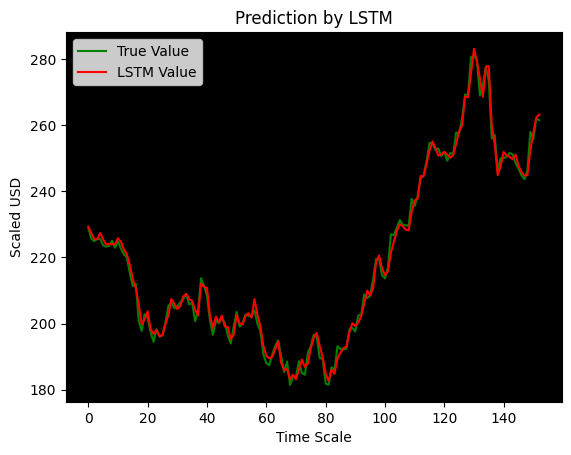

In [24]:
#Predicted vs True Adj Close Value – LSTM
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(y_test, label='True Value', color='green')
plt.plot(y_pred, label='LSTM Value', color='red')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()